In [1]:
# 科学计算
# 微积分
# 数据基本处理

In [11]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.patches as mc
import scipy.integrate as si
import scipy.misc as sm
import scipy.ndimage as sn
import sys

In [2]:
# 插值

# scipy提供了常见的插值算法可以通过一组离散点，返回一个一定符合该组离散点规律插值器函数。（有点像拟合）
# 若我们给插值器函数更多的散点x坐标序列，该函数将会返回相应的y坐标序列。

# 可以用来画动画（离散数据连续化）

'''
func = si.interp1d(
    离散水平坐标, 
    离散垂直坐标,
    kind=插值算法(缺省为线性插值)
)
'''


'\nfunc = si.interp1d(\n    离散水平坐标, \n    离散垂直坐标,\n    kind=插值算法(缺省为线性插值)\n)\n'

area: 216.67037037036945


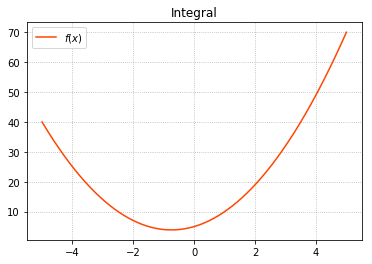

In [22]:
# 积分

def f(x):
    return 2 * x**2 + 3 * x +5

a, b = -5, 5
x = np.linspace(a,b,1000)
y = f(x)
mp.figure('Integral')
mp.title('Integral')
mp.grid(linestyle=':')
mp.plot(x, y, c='orangered', zorder=3, label=r'$f(x)$')

# 计算f(x) 在[-5,5]区间的定积分
n = 300
x = np.linspace(a, b, n+1)
y = f(x)
area = 0
for i in range(n):
    area += (y[i] + y[i+1]) * (x[1]-x[0])/2
    
print('area:',area)


mp.legend()
mp.show()

(216.66666666666663, 2.4054832200211722e-12)


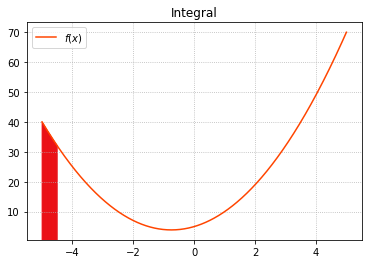

In [24]:
# 微分法绘制函数在与x轴还有[-5, 5]所组成的闭合区域中的小梯形。

def f(x):
    return 2 * x**2 + 3 * x +5

a, b = -5, 5
x = np.linspace(a,b,1000)
y = f(x)
mp.figure('Integral')
mp.title('Integral')
mp.grid(linestyle=':')
mp.plot(x, y, c='orangered', zorder=3, label=r'$f(x)$')


for i in range(n):   # 划分成小区域再累加（定义四个点，得到多边形）
    mp.gca().add_patch(mc.Polygon([
        [x[i], 0], [x[i], y[i]],
        [x[i + 1], y[i + 1]], [x[i + 1], 0]],
        fc='deepskyblue', ec='red',
        alpha=0.5))

# 基于 scipy 求积分
r = si.quad(f, -5, 5)
print(r)
    
mp.legend()
mp.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


(512, 512)


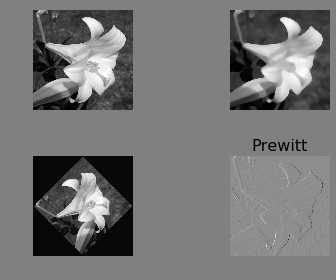

In [18]:
# 图像

# scipy.ndimage中提供了一些简单的图像处理，如高斯模糊、任意角度旋转、边缘识别等功能。


#读取文件   imread
img = sm.imread('/Users/peng/Desktop/ToStudent/month05 datasci/da_data/lily.jpg', True)
print(img.shape)

mp.figure('Ndimage', facecolor='gray')
mp.subplot(221)
mp.axis('off')
mp.imshow(img, cmap='gray')


#高斯模糊   median_filter
median = sn.median_filter(img, 20)   # 21,参数越大， 越模糊
mp.subplot(222)
mp.axis('off')
mp.imshow(median, cmap='gray')

#角度旋转  rotate
rotate = sn.rotate(img, 45)
mp.subplot(223)
mp.axis('off')
mp.imshow(rotate, cmap='gray')

#边缘识别  prewitt
prewitt = sn.prewitt(img)
mp.subplot(224)
mp.title('Prewitt', fontsize=16)
mp.axis('off')
mp.imshow(prewitt, cmap='gray')


mp.tight_layout()
mp.show()

In [19]:
# 金融相关


# 终值 = np.fv(利率, 期数, 每期支付, 现值)
# 将1000元以1%的年利率存入银行5年，每年加存100元，
# 到期后本息合计多少钱？
fv = np.fv(0.01, 5, -100, -1000)
print(round(fv, 2))

# 现值 = np.pv(利率, 期数, 每期支付, 终值)
# 将多少钱以1%的年利率存入银行5年，每年加存100元，
# 到期后本息合计fv元？
pv = np.pv(0.01, 5, -100, fv)
print(pv)

# 净现值 = np.npv(利率, 现金流)
# 将1000元以1%的年利率存入银行5年，每年加存100元，
# 相当于一次性存入多少钱？
npv = np.npv(0.01, [
    -1000, -100, -100, -100, -100, -100])
print(round(npv, 2))
fv = np.fv(0.01, 5, 0, npv)
print(round(fv, 2))

# 内部收益率 = np.irr(现金流)
# 将1000元存入银行5年，以后逐年提现100元、200元、
# 300元、400元、500元，银行利率达到多少，可在最后
# 一次提现后偿清全部本息，即净现值为0元？
irr = np.irr([-1000, 100, 200, 300, 400, 500])
print(round(irr, 2))
npv = np.npv(irr, [-1000, 100, 200, 300, 400, 500])
print(npv)

# 每期支付 = np.pmt(利率, 期数, 现值)
# 以1%的年利率从银行贷款1000元，分5年还清，
# 平均每年还多少钱？
pmt = np.pmt(0.01, 5, 1000)
print(round(pmt, 2))

# 期数 = np.nper(利率, 每期支付, 现值)
# 以1%的年利率从银行贷款1000元，平均每年还pmt元，
# 多少年还清？
nper = np.nper(0.01, pmt, 1000)
print(int(nper))

# 利率 = np.rate(期数, 每期支付, 现值, 终值)
# 从银行贷款1000元，平均每年还pmt元，nper年还清，
# 年利率多少？
rate = np.rate(nper, pmt, 1000, 0)
print(round(rate, 2))


1561.11
-1000.0
-1485.34
1561.11
0.12
0.0
-206.04
5
0.01
